In [1]:
#import MPO_hyperparameter_v2
#import MPO_tt_v2
#import MPO_inference_v2
import MPO_train_v2 as MPO

from neural_networks import *

# Pre-processing

## 1. Train

In [2]:
D = 16
threshold = 90

In [3]:
# List of layer 1 weights (0-3), layer 1 bias (4), layer 2 weights (5-8), layer 2 bias (9)
weights = MPO.main(r_1=D, r_2=D)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Accuracy at step 0: 0.1408
Accuracy at step 1: 0.2903
Accuracy at step 3: 0.4168
Accuracy at step 5: 0.5138
Accuracy at step 16: 0.6097
Accuracy at step 27: 0.6537
Guessing
After 37 trainning step(s),best accuracy=0.6537
Accuracy at step 0: 0.1894
Ac

## 2. Open weights matrices into correct MPO

In [4]:
sigma = [4, 7, 7, 4]
sigma_prime = [4, 4, 4, 4]
MPO_0, bias_0 = weights_to_MPO(weights, D, sigma, sigma_prime, layer=0)

In [5]:
sigma = [4, 4, 4, 4]
sigma_prime = [1, 10, 1, 1]
MPO_1, bias_1 = weights_to_MPO(weights, D, sigma, sigma_prime, layer=1)

## 3. Check that MPO is correct based on accuracy from model

In [6]:
acc, t = FC2(MPO_0, bias_0, MPO_1, bias_1)
print(acc, "%", t, "s")

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
93.84 % 0.01993274688720703 s


## 4. Close legs to use for compression algorithm

In [14]:
MPS_0 = close_legs(MPO_0)
MPS_1 = close_legs(MPO_1)

## 5. Compress MPS layers

In [15]:
compressed_MPS_0, dist, sim = compress_layer(MPS_0, phys_dim=[16, 28, 28, 16], threshold=1e-8, plot=0)

Sim: 117.91232591840878 Dist: 42.691194800974074 BondDim: 1
Sim: 429.66428276124674 Dist: 38.86883271583903 BondDim: 2
Sim: 690.1555883052753 Dist: 35.35950863838254 BondDim: 3
Sim: 912.5695951151363 Dist: 32.06058084841866 BondDim: 4
Sim: 1103.2080423843286 Dist: 28.93514121390799 BondDim: 5
Sim: 1281.056671062565 Dist: 25.67866368000018 BondDim: 6
Sim: 1416.774154023561 Dist: 22.883974423809434 BondDim: 7
Sim: 1533.9997354202426 Dist: 20.160622610248954 BondDim: 8
Sim: 1633.1726532332307 Dist: 17.529340724051615 BondDim: 9
Sim: 1707.445645662578 Dist: 15.264494547496373 BondDim: 10
Sim: 1767.446641795692 Dist: 13.15309080244774 BondDim: 11
Sim: 1819.725585925067 Dist: 10.987486224248736 BondDim: 12
Sim: 1860.7860246138414 Dist: 8.925492414387222 BondDim: 13
Sim: 1893.0746042447363 Dist: 6.883010620970226 BondDim: 14
Sim: 1918.6134122898752 Dist: 4.673010503224804 BondDim: 15


In [16]:
compressed_MPS_0.append(MPS_0)

In [17]:
compressed_MPS_1, dist, sim = compress_layer(MPS_1, phys_dim=[4, 40, 4, 4], threshold=1e-8, plot=0)

Sim: 6.857969391166761 Dist: 7.766091277874259 BondDim: 1
Sim: 27.02788102625734 Dist: 6.335792144726977 BondDim: 2
Sim: 45.993606144741314 Dist: 4.601797147061144 BondDim: 3
Sim: 56.84781072550031 Dist: 3.2128386828381394 BondDim: 4
Sim: 60.96309385230847 Dist: 2.49139504597985 BondDim: 5
Sim: 63.04121983620351 Dist: 2.031975219149555 BondDim: 6
Sim: 64.51362784492578 Dist: 1.6298819842294232 BondDim: 7
Sim: 65.68099207616243 Dist: 1.2203077690807973 BondDim: 8
Sim: 66.48872358017053 Dist: 0.8254814033464993 BondDim: 9
Sim: 66.80541868018551 Dist: 0.6039242065490464 BondDim: 10
Sim: 67.01546366979306 Dist: 0.39329309382233263 BondDim: 11
Sim: 67.08371164977086 Dist: 0.29399230886286076 BondDim: 12
Sim: 67.13207504006974 Dist: 0.19511044916057538 BondDim: 13
Sim: 67.16652138679598 Dist: 0.06018089934059334 BondDim: 14
Sim: 67.16947188724825 Dist: 0.02590830355640397 BondDim: 15


In [18]:
compressed_MPS_1.append(MPS_1)

In [19]:
print("Orig:", calculate_params(MPS_0))
for i in range(len(compressed_MPS_0)):
    print(i+1, round(calculate_params(compressed_MPS_0[i])/calculate_params(MPS_0)*100, 2), "% of Orig")

Orig: 14848
1 0.59 % of Orig
2 1.94 % of Orig
3 4.04 % of Orig
4 6.9 % of Orig
5 10.51 % of Orig
6 14.87 % of Orig
7 19.99 % of Orig
8 25.86 % of Orig
9 32.49 % of Orig
10 39.87 % of Orig
11 48.01 % of Orig
12 56.9 % of Orig
13 66.54 % of Orig
14 76.94 % of Orig
15 88.09 % of Orig
16 100.0 % of Orig


In [20]:
print("Orig:", calculate_params(MPS_1))
for i in range(len(compressed_MPS_1)):
    print(i+1, round(calculate_params(compressed_MPS_1[i])/calculate_params(MPS_1)*100, 2), "% of Orig")

Orig: 11392
1 0.46 % of Orig
2 1.69 % of Orig
3 3.69 % of Orig
4 6.46 % of Orig
5 8.01 % of Orig
6 9.55 % of Orig
7 11.1 % of Orig
8 12.64 % of Orig
9 14.19 % of Orig
10 15.73 % of Orig
11 17.28 % of Orig
12 18.82 % of Orig
13 20.37 % of Orig
14 21.91 % of Orig
15 23.46 % of Orig
16 100.0 % of Orig


# Accuracy Tests

## 1. Check accuracy for each compressed dimension

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t1

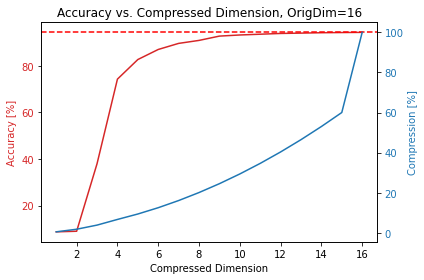

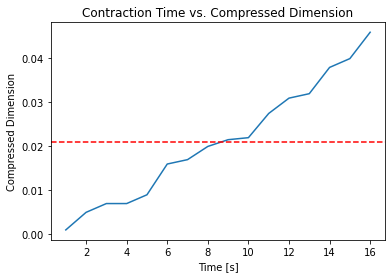

In [21]:
test_overall_accuracy_FC2(compressed_MPS_0, compressed_MPS_1, MPO_0, bias_0, MPO_1, bias_1, sigma_0=[4,7,7,4], sigma_1=[4,4,4,4], sigma_2=[1,10,1,1])

## 2. Check accuracy when compressing one layer at a time

In [22]:
def test_accuracy_single_layer(compressed_MPS_0, compressed_MPS_1, sigma, sigma_prime, layer):
    ### Check changes in W1 for constant W0
    plt.figure()
    for W0_dim in range(1, len(compressed_MPS_0)+1):
        acc_compressed = []
        time_compressed = []
        MPS_0_test = compressed_MPS_0[W0_dim-1]
        for W1_dim in range(1, len(compressed_MPS_1)+1):
            MPS_1_test = compressed_MPS_1[W1_dim-1]

            dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
            dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
            MPO_0_test = open_legs(MPS_0_test, MPO_0, bond_dim=dim_0)
            MPO_1_test = open_legs(MPS_1_test, MPO_1, bond_dim=dim_1)

            acc, t = FC2(MPO_0_test, bias_0, MPO_1_test, bias_1)
            acc_compressed.append(acc)
            time_compressed.append(t)

        acc_orig, time_orig = FC2(MPO_0, bias_0, MPO_1, bias_1)
        plt.plot(range(1, len(compressed_MPS_0)+1), acc_compressed, label="W0_dim=%d" % W0_dim)
        plt.axhline(threshold, color='r', linestyle='--')
        plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
        plt.title('Accuracy vs. Compressed Dimension, OrigDim=%d' %(len(compressed_MPS_0)+1))
        plt.xlabel('Compressed Dimension W1')
        plt.ylabel('Accuracy [%]')

mages-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
E

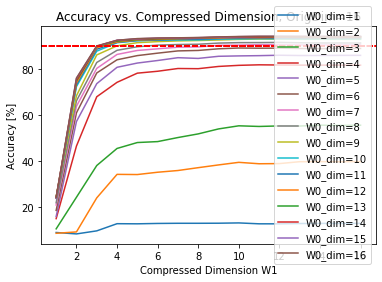

In [23]:
### Check changes in W1 for constant W0
plt.figure()
for W0_dim in range(1, len(compressed_MPS_0)+1):
    acc_compressed = []
    time_compressed = []
    MPS_0_test = compressed_MPS_0[W0_dim-1]
    for W1_dim in range(1, len(compressed_MPS_1)+1):
        MPS_1_test = compressed_MPS_1[W1_dim-1]

        dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
        dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
        MPO_0_test = open_legs(MPS_0_test, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=dim_0)
        MPO_1_test = open_legs(MPS_1_test, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)

        acc, t = FC2(MPO_0_test, bias_0, MPO_1_test, bias_1)
        #acc, t = FC2(MPS_0_test, bias_0, MPS_1_test, bias_1)
        acc_compressed.append(acc)
        time_compressed.append(t)

    acc_orig, time_orig = FC2(MPO_0, bias_0, MPO_1, bias_1)
    plt.plot(range(1, len(compressed_MPS_0)+1), acc_compressed, label="W0_dim=%d" % W0_dim)
    plt.axhline(threshold, color='r', linestyle='--')
    plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    plt.title('Accuracy vs. Compressed Dimension, OrigDim=%d' %(len(compressed_MPS_0)))
    plt.xlabel('Compressed Dimension W1')
    plt.ylabel('Accuracy [%]')

mages-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
E

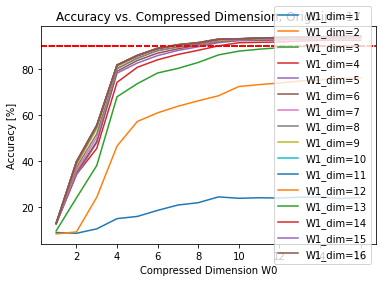

In [24]:
### Check changes in W0 for constant W1
plt.figure()
for W1_dim in range(1, len(compressed_MPS_1)+1):
    acc_compressed = []
    time_compressed = []
    MPS_1_test = compressed_MPS_1[W1_dim-1]
    for W0_dim in range(1, len(compressed_MPS_0)+1):
        MPS_0_test = compressed_MPS_0[W0_dim-1]

        dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
        dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
        MPO_0_test = open_legs(MPS_0_test, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=dim_0)
        MPO_1_test = open_legs(MPS_1_test, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)

        acc, t = FC2(MPO_0_test, bias_0, MPO_1_test, bias_1)
        acc_compressed.append(acc)
        time_compressed.append(t)


    acc_orig, time_orig = FC2(MPO_0, bias_0, MPO_1, bias_1)
    plt.plot(range(1, len(compressed_MPS_0)+1), acc_compressed, label="W1_dim=%d" % W1_dim)
    plt.legend(loc='center right', bbox_to_anchor=(1, 0.5))
    plt.axhline(threshold, color='r', linestyle='--')
    plt.title('Accuracy vs. Compressed Dimension, OrigDim=%d' %(len(compressed_MPS_1)+1))
    plt.xlabel('Compressed Dimension W0')
    plt.ylabel('Accuracy [%]')

## 3. Heatmap of accuracy by layer dimension

mages-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
E

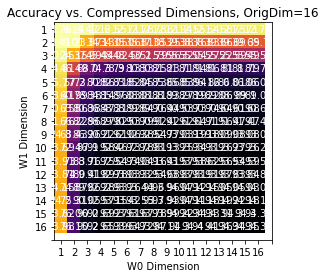

In [29]:
acc_orig, time_orig = FC2(MPO_0, bias_0, MPO_1, bias_1)
acc_matrix = []
for W0_dim in range(1, len(compressed_MPS_0)+1):
    acc_array = []
    MPS_0_test = compressed_MPS_0[W0_dim-1]
    for W1_dim in range(1, len(compressed_MPS_1)+1):
        MPS_1_test = compressed_MPS_1[W1_dim-1]

        dim_0 = [MPS_0_test[0].shape[1], MPS_0_test[1].shape[1], MPS_0_test[2].shape[1], MPS_0_test[3].shape[1]]
        dim_1 = [MPS_1_test[0].shape[1], MPS_1_test[1].shape[1], MPS_1_test[2].shape[1], MPS_1_test[3].shape[1]]
        MPO_0_test = open_legs(MPS_0_test, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=dim_0)
        MPO_1_test = open_legs(MPS_1_test, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=dim_1)


        acc, _ = FC2(MPO_0_test, bias_0, MPO_1_test, bias_1)
        acc_array.append(acc)
    acc_matrix.append(acc_array)

Text(0.5, 1.0, 'Accuracy vs. Compressed Dimensions, OrigDim=16')

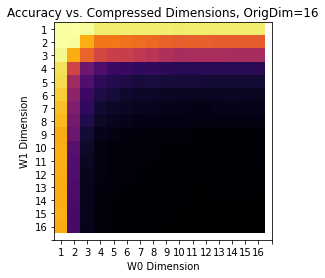

In [33]:
### Plotting
fig, ax = plt.subplots()
im = ax.imshow(acc_matrix, cmap='inferno_r')

# We want to show all ticks...
ax.set_xticks(np.arange(len(compressed_MPS_0)+1))
ax.set_yticks(np.arange(len(compressed_MPS_1)+1))
# ... and label them with the respective list entries
ax.set_xticklabels(np.arange(1, len(compressed_MPS_0)+1))
ax.set_yticklabels(np.arange(1, len(compressed_MPS_1)+1))

# Rotate the tick labels and set their alignment.
# plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#          rotation_mode="anchor")

plt.xlabel('W1 Dimension')
plt.ylabel('W0 Dimension')
plt.title('Accuracy vs. Compressed Dimensions, OrigDim=%d' % D)
# Loop over data dimensions and create text annotations.
# for i in range(len(compressed_MPS_0)):
#     for j in range(len(compressed_MPS_1)):
#         text = ax.text(j, i, np.round(acc_matrix[i][j], 2),
#                        ha="center", va="center", color="w")

## 4. Compression ratio for layer dimensions

In [34]:
orig_params = calculate_params(MPS_0)+calculate_params(MPS_1)
params_matrix = []
compression_ratio_matrix = []
for i in range(len(compressed_MPS_0)):
    compression_ratio = []
    for j in range(len(compressed_MPS_1)):
        params = calculate_params(compressed_MPS_0[i]) + calculate_params(compressed_MPS_1[j])
        compression_ratio.append(round(params/orig_params*100, 2))
    compression_ratio_matrix.append(compression_ratio)

Text(0.5, 1.0, 'Compression Ratio vs. Compressed Dimensions, OrigDim=16')

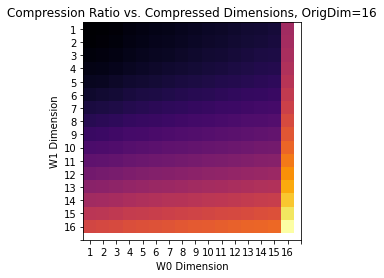

In [37]:
### Plotting
fig, ax = plt.subplots()
im = ax.imshow(compression_ratio_matrix, cmap='inferno')

ax.set_xticks(np.arange(len(compressed_MPS_0)+1))
ax.set_yticks(np.arange(len(compressed_MPS_1)+1))
ax.set_xticklabels(np.arange(1, len(compressed_MPS_0)+1))
ax.set_yticklabels(np.arange(1, len(compressed_MPS_1)+1))

plt.xlabel('W1 Dimension')
plt.ylabel('W0 Dimension')
plt.title('Compression Ratio vs. Compressed Dimensions, OrigDim=%d' % D)

# Loop over data dimensions and create text annotations.
# for i in range(len(compressed_MPS_0)):
#     for j in range(len(compressed_MPS_1)):
#         text = ax.text(j, i, np.round(compression_ratio_matrix[i][j], 2),
#                        ha="center", va="center", color="w")

## 5. Compression ratio for accuracy above threshold 

Best Compression: 17.47 %
W0_dim =  7
W1_dim =  9


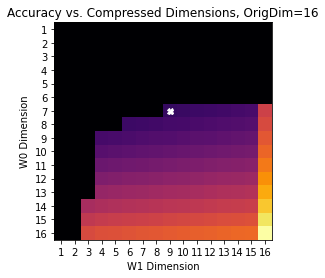

In [31]:
compression_ratio_plot = np.array(compression_ratio_matrix[:])
acc_matrix_plot = np.array(acc_matrix[:])
compression_ratio_plot[acc_matrix_plot < threshold] = 0

fig, ax = plt.subplots()
im = ax.imshow(compression_ratio_plot, cmap='inferno')
ax.set_xticks(np.arange(len(compressed_MPS_0)+1))
ax.set_yticks(np.arange(len(compressed_MPS_1)+1))
ax.set_xticklabels(np.arange(1, len(compressed_MPS_0)+1))
ax.set_yticklabels(np.arange(1, len(compressed_MPS_1)+1))

plt.xlabel('W1 Dimension')
plt.ylabel('W0 Dimension')
plt.title('Accuracy vs. Compressed Dimensions, OrigDim=%d' % D)
try:
    minval = np.min(compression_ratio_plot[np.nonzero(compression_ratio_plot)])
    ij = np.where(compression_ratio_plot == minval)
    plt.plot(ij[1], ij[0], 'wX')
    print("Best Compression:", minval, "%")
    print("W0_dim = ", ij[0][0]+1)
    print("W1_dim = ", ij[1][0]+1)
except:
    print("Layers cannot be compressed and still reach given threshold")


# Loop over data dimensions and create text annotations.
# for i in range(len(compressed_MPS_0)):
#     for j in range(len(compressed_MPS_1)):
#         text = ax.text(j, i, np.round(compression_ratio_matrix[i][j], 2),
#                        ha="center", va="center", color="w")

## 6. Dependence of accuracy on compression

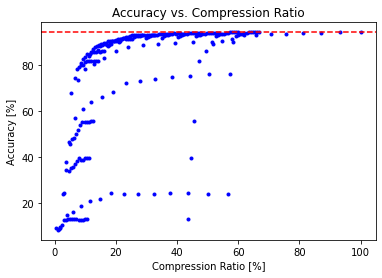

In [39]:
sorted_comp = np.array(compression_ratio_matrix[:])
sorted_acc = np.array(acc_matrix[:])
sorted_comp = np.reshape(sorted_comp, sorted_comp.size)
sorted_acc = np.reshape(sorted_acc, sorted_acc.size)
sorted_comp, sorted_acc = zip(*sorted(zip(sorted_comp, sorted_acc)))

plt.plot(sorted_comp, sorted_acc, 'b.')

plt.title("Accuracy vs. Compression Ratio")
plt.xlabel("Compression Ratio [%]")
plt.ylabel("Accuracy [%]")
plt.axhline(acc_orig, color='r', linestyle='--')

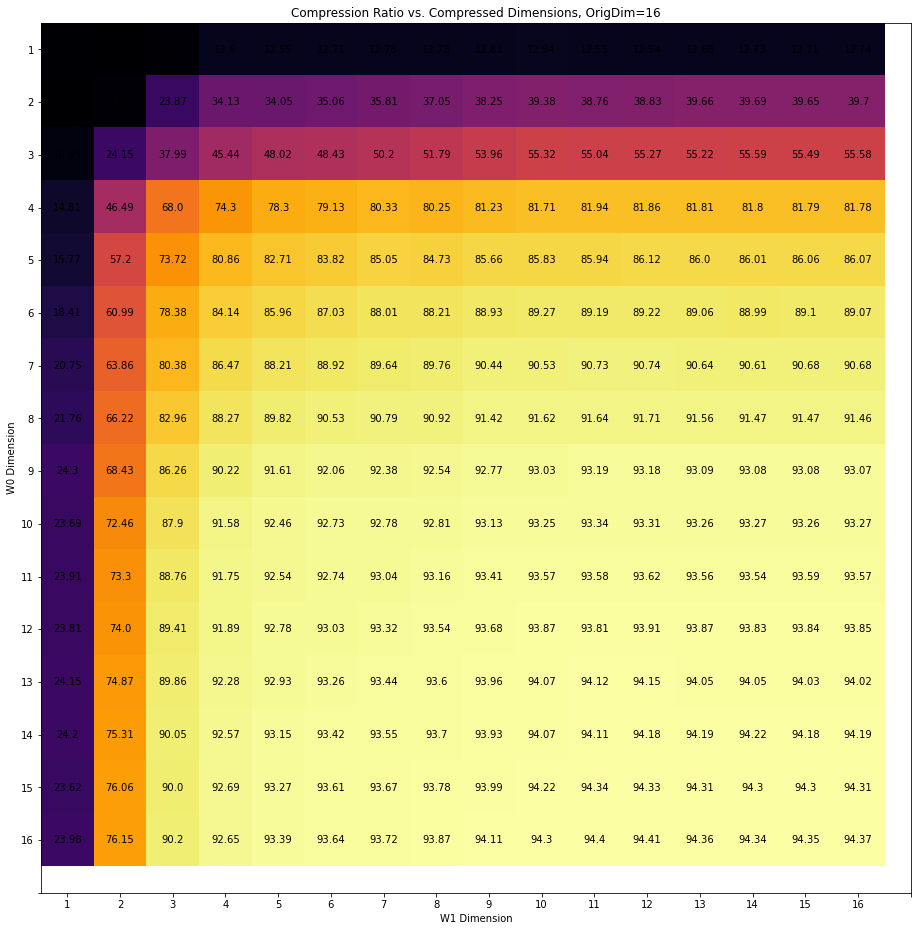

In [169]:
### Plotting
plt.figure(figsize = (16,16))
plt.imshow(acc_matrix_plot, cmap='inferno')

plt.xticks(np.arange(len(compressed_MPS_0)+1), labels=np.arange(1, len(compressed_MPS_0)+1))
plt.yticks(np.arange(len(compressed_MPS_1)+1), labels=np.arange(1, len(compressed_MPS_1)+1))
plt.xlabel(np.arange(1, len(compressed_MPS_0)+1))
plt.ylabel(np.arange(1, len(compressed_MPS_1)+1))

plt.xlabel('W1 Dimension')
plt.ylabel('W0 Dimension')
plt.title('Compression Ratio vs. Compressed Dimensions, OrigDim=%d' % D)

# Loop over data dimensions and create text annotations.
for i in range(len(compressed_MPS_0)):
    for j in range(len(compressed_MPS_1)):
        text = plt.text(j, i, np.round(acc_matrix_plot[i][j], 2),
                       ha="center", va="center", color="k")

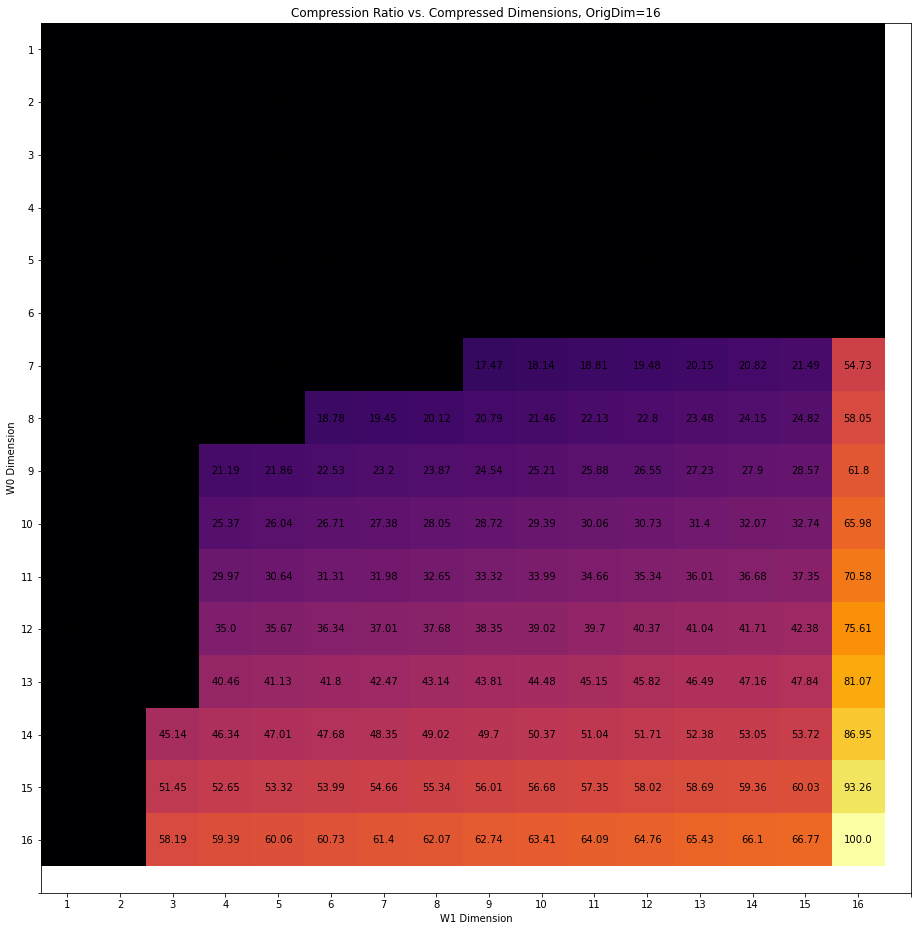

In [177]:
### Plotting
plt.figure(figsize = (16,16))
plt.imshow(compression_ratio_plot, cmap='inferno')

plt.xticks(np.arange(len(compressed_MPS_0)+1), labels=np.arange(1, len(compressed_MPS_0)+1))
plt.yticks(np.arange(len(compressed_MPS_1)+1), labels=np.arange(1, len(compressed_MPS_1)+1))
plt.xlabel(np.arange(1, len(compressed_MPS_0)+1))
plt.ylabel(np.arange(1, len(compressed_MPS_1)+1))

plt.xlabel('W1 Dimension')
plt.ylabel('W0 Dimension')
plt.title('Compression Ratio vs. Compressed Dimensions, OrigDim=%d' % D)

# Loop over data dimensions and create text annotations.
for i in range(len(compressed_MPS_0)):
    for j in range(len(compressed_MPS_1)):
        text = plt.text(j, i, np.round(compression_ratio_plot[i][j], 2),
                       ha="center", va="center", color="k")

In [7]:
def compress_layer_single_dim(raw_state, phys_dim, threshold, compressed_dim, compressed_state=0, plot=0):
    """ Initializes a compressed state then sweeps left->right
        and right->left until a minimum is reached
        i.e. the difference in our metrics between sweeps is less than a
        specified threshold up to the bond dimension of the raw state

        Note: Does NOT normalize the state unlike the compression function
              found in compression.py

    Args:
        raw_state: MPS to be compressed
        phys_dim: List of physical dimensions by site
        threshold: Difference between sweeps under which a solution is found
        compressed_state: Initial starting state if necessary
                          otherwise a random MPS is ini
        plot: Whether or not to plot the compression values (0 off, 1 on)

    Returns:
        compressions: Final compressed state at each bond dimension
        best_dist: List of overlap values for each bond dimension
        best_sim: List of cosine similarity values for each bond dimension
    """
    compressed_state = init.initialize_random_MPS_with_changing_phys_dim(phys_dim,
                                                                         num_sites=len(raw_state),
                                                                         bond_dim=compressed_dim)
    bond_dim_raw_state = raw_state[math.ceil(len(raw_state)/2)].shape[0]

    # Initialize accuracy metrics
    dist = []  # Frobenius norm
    sim = []   # Cosine similarity (Scalar product)
    dist.append(metrics.overlap(compressed_state, raw_state))
    sim.append(metrics.scalar_product(compressed_state, raw_state))
    # We sweep left to right and then back right to left across the mixed state
    while True:
        # Left->right sweep
        for site in range(0, len(raw_state)-1):
            compressed_state[site], compressed_state[site+1] = comp.update_site(compressed_state, raw_state,
                                                                           site=site, dir='right')
        # Right->left sweep
        for site in range(len(raw_state)-1, 0, -1):
            compressed_state[site], compressed_state[site-1] = comp.update_site(compressed_state, raw_state,
                                                                           site=site, dir='left')

        # Metrics taken after each sweep
        dist.append(metrics.overlap(compressed_state, raw_state))
        sim.append(metrics.scalar_product(compressed_state, raw_state))
        # Check if sweeps are still working
        if np.abs(dist[-2]-dist[-1]) < threshold:
            # Normalize to maintain length and update metrics
            #compressed_state, _ = can.left_normalize(compressed_state)
            #best_dist.append((metrics.overlap(compressed_state, raw_state)))
            #best_sim.append(metrics.scalar_product(compressed_state, raw_state))
            if plot == 0:
                print("Sim:", sim[-1], "Dist:", dist[-1], "BondDim:", compressed_dim)
            #compressions.append(compressed_state[:])
            break

    return compressed_state, dist, sim


In [90]:
dim7, _, _ = compress_layer_single_dim(MPS_0, phys_dim=[16,28,28,16], threshold=1e-6, compressed_dim=7)

Sim: 1416.7738952881136 Dist: 22.883980077010524 BondDim: 7


In [91]:
metrics.overlap(compressed_MPS_0[6], MPS_0)

22.883974423809434

In [93]:
metrics.overlap(dim7, MPS_0)

22.883980077010524

In [190]:
# 1. Starting state
# 2. Compress all layers down by 1
# 3. Calculate delta_params in all directions
# 4. Calculate delta_acc in all directions
# 5. Moved based on minimizing delta_acc/delta_params

sigma = [4, 7, 7, 4]
sigma_prime = [4, 4, 4, 4]
MPO_0, bias_0 = weights_to_MPO(weights, D, sigma, sigma_prime, layer=0)

sigma = [4, 4, 4, 4]
sigma_prime = [1, 10, 1, 1]
MPO_1, bias_1 = weights_to_MPO(weights, D, sigma, sigma_prime, layer=1)

layers = [MPO_0, MPO_1]

acc, _ = FC2(MPO_0, bias_0, MPO_1, bias_1)
threshold = 90
last_updated = np.ones(len(layers))
while True:
    print(acc)
    # 1. Starting state
    MPS_0 = close_legs(layers[0])
    MPS_1 = close_legs(layers[1])

    # 2. Compress all layers down by 1
    dim0 = MPS_0[math.ceil(len(MPS_0)/2)].shape[0]
    dim1 = MPS_1[math.ceil(len(MPS_1)/2)].shape[0]
    
    if last_updated[0] == 1:
        compressed_0, _, _ = compress_layer_single_dim(MPS_0, phys_dim=[16,28,28,16], threshold=1e-6, compressed_dim=dim0-1)
        bonds0 = [compressed_0[0].shape[1], compressed_0[1].shape[1], compressed_0[2].shape[1], compressed_0[3].shape[1]]
        new_MPO_0 = open_legs(compressed_0, sigma=[4,7,7,4], sigma_prime=[4,4,4,4], bond_dim=bonds0)
    if last_updated[1] == 1:
        compressed_1, _, _ = compress_layer_single_dim(MPS_1, phys_dim=[4,40,4,4], threshold=1e-6, compressed_dim=dim1-1)
        bonds1 = [compressed_1[0].shape[1], compressed_1[1].shape[1], compressed_1[2].shape[1], compressed_1[3].shape[1]]
        new_MPO_1 = open_legs(compressed_1, sigma=[4,4,4,4], sigma_prime=[1,10,1,1], bond_dim=bonds1)
    MPOs = [new_MPO_0, new_MPO_1]

    # 3. Calculate delta_params
    delta_params0 = calculate_params(MPO_0) - calculate_params(new_MPO_0)
    delta_params1 = calculate_params(MPO_1) - calculate_params(new_MPO_1)

    # 4. Calculate delta_acc
    new_acc0, _ = FC2(new_MPO_0, bias_0, layers[1], bias_1)
    new_acc1, _ = FC2(layers[0], bias_0, new_MPO_1, bias_1)
    new_acc = [new_acc0, new_acc1]
    delta_acc0 = acc - new_acc0
    delta_acc1 = acc - new_acc1

    # 5. Calculate slope
    slope = [delta_acc0/delta_params0, delta_acc1/delta_params1]

    # 6. Find minimum slope
    index = np.argmin(slope)

    # 7. Update layers
    if new_acc0 < threshold and new_acc1 < threshold:
        break
    else:
        layers[index] = MPOs[index]
        acc = new_acc[index]
        last_updated = np.zeros(len(layers))
        last_updated[index] = 1
        print(last_updated)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
94.37
Sim: 1918.6133628357156 Dist: 4.67301579468848 BondDim: 15
Sim: 67.16947188700746 Dist: 0.025908308203618925 BondDim: 15
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
[0. 1.]
94.35
Sim: 67.1665213865352 Dist: 0.05431850948205217 BondDim: 14
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.

In [200]:
orig_params = calculate_params(MPO_0) + calculate_params(MPO_1)
params = calculate_params(layers[0]) + calculate_params(layers[1])
print(round(params/orig_params*100, 2))

21.19


In [201]:
orig_params = calculate_params(MPO_0) + calculate_params(MPO_1)
params = calculate_params(compressed_MPS_0[6]) + calculate_params(compressed_MPS_1[8])
print(round(params/orig_params*100, 2))

17.47


In [202]:
orig_params = 768*256 + 256*10

In [203]:
#orig_params = calculate_params(MPO_0) + calculate_params(MPO_1)
params = calculate_params(compressed_MPS_0[6]) + calculate_params(compressed_MPS_1[8])
print(round(params/orig_params*100, 2))

2.3


In [204]:
#orig_params = calculate_params(MPO_0) + calculate_params(MPO_1)
params = calculate_params(layers[0]) + calculate_params(layers[1])
print(round(params/orig_params*100, 2))

2.79


In [8]:
def vector_to_left_canonical_MPS_NN(tensor, phys_dim):
    """ Decomposes a vector of length d^L (phys_dim^num_sites) into a
        left-canonical MPS. Final site will not be canonical due to
        original norm

    Args:
        tensor: Vector of length that can be described by d^L (Ex: 512 = 2^9)
        phys_dim: Physical dimension necessary on MPS at each site (d)
        num_sites: Number of sites necessary (L)

    Returns:
        A_tensors: Left canonical form of input MPS
    """

    A_tensors = []
    num_sites = len(phys_dim)
    for i in range(0, num_sites-1):
        # Remove one leg such that tensor has shape (d, d^(L-1)) with L sites
        if i == 0:
            reshaped_tensor = np.reshape(tensor, (phys_dim[i],
                                                  tensor.shape[0]//phys_dim[i]))
        else:
            reshaped_tensor = np.reshape(tensor, (A_tensors[-1].shape[1]*phys_dim[i],
                                                  tensor.shape[1]//phys_dim[i]))       
        #print("Reshape:", reshaped_tensor.shape)

        # SVD and save the rank for the next iteration of the loop
        U, S_vector, V = np.linalg.svd(reshaped_tensor, full_matrices=False)
        rank = len(S_vector)

        if i == 0:
            # No need to reshape since U is already a left-canonical matrix
            A_tensors.append(U)
        else:
            # Break apart first leg of U into a left bond dimension
            # and physical dimension
            U = np.reshape(U, (A_tensors[-1].shape[1], phys_dim[i], U.shape[1]))
            # Transpose so that we have the correct shape
            # (left bond, right bond, physical dimension)
            U = np.transpose(U, (0, 2, 1))
            A_tensors.append(U)

        # We recreate the tensor with the remaining legs
        tensor = np.diag(S_vector) @ V
    # Final A tensor is the remaining tensor after all other legs removed
    A_tensors.append(tensor.T)

    return A_tensors

In [13]:
sigma = [4, 7, 7, 4]
sigma_prime = [4, 4, 4, 4]
MPO_0, bias_0 = weights_to_MPO(weights, D, sigma, sigma_prime, layer=0)

sigma = [4, 4, 4, 4]
sigma_prime = [1, 10, 1, 1]
MPO_1, bias_1 = weights_to_MPO(weights, D, sigma, sigma_prime, layer=1)

In [14]:
acc, _ = FC2(MPO_0, bias_0, MPO_1, bias_1)
print(acc)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
93.84


In [10]:
temp = con.contract_horizontal(MPO_0[0], MPO_0[1], 'right')
temp = con.contract_horizontal(temp, MPO_0[2], 'right')
W_0 = con.contract_horizontal(temp, MPO_0[3], 'right')

temp = con.contract_horizontal(MPO_1[0], MPO_1[1], 'right')
temp = con.contract_horizontal(temp, MPO_1[2], 'right')
W_1 = con.contract_horizontal(temp, MPO_1[3], 'right')

vector_W0 = np.reshape(W_0, (W_0.shape[0]*W_0.shape[1]))
MPS_0 = vector_to_left_canonical_MPS_NN(vector_W0, phys_dim=[4, 4, 28, 28, 4, 4])

vector_W1 = np.reshape(W_1, (W_1.shape[0]*W_1.shape[1]))
MPS_1 = vector_to_left_canonical_MPS_NN(vector_W1, phys_dim=[2, 2, 40, 4, 2, 2])

In [15]:
acc, _ = FC2(MPS_0, bias_0, MPS_1, bias_1)
print(acc)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
93.84


In [30]:
def open_legs(MPS, sigma, sigma_prime, bond_dim):
    """ Converts an MPS to an MPO by opening the physical dimensions

    Args:
        MPS: List of tensors of MPS
        sigma: List of input physical dimensions
        sigma_prime: List of output physical dimensions
        bond_dim: List of bond dimensions

    Returns:
        MPO: List of tensors of MPO with given dimensions
    """
    MPO = []
    for i, site in enumerate(MPS):
        if i == 0 or i == len(MPS)-1:
            site = np.reshape(site.T, (bond_dim[i], sigma[i], sigma_prime[i]))
        else:
            site = np.reshape(site, (bond_dim[i-1], bond_dim[i], sigma[i], sigma_prime[i]))
        MPO.append(site)
    return MPO

In [31]:
bond0 = [MPS_0[0].shape[1], MPS_0[1].shape[1], MPS_0[2].shape[1], MPS_0[3].shape[1], MPS_0[4].shape[1], MPS_0[5].shape[1]]
bond1 = [MPS_1[0].shape[1], MPS_1[1].shape[1], MPS_1[2].shape[1], MPS_1[3].shape[1], MPS_1[4].shape[1], MPS_1[5].shape[1]]
MPO_0 = open_legs(MPS_0, sigma=[2, 2, 7, 7, 2, 2], sigma_prime=[2, 2, 4, 4, 2, 2], bond_dim=bond0)
MPO_1 = open_legs(MPS_1, sigma=[2, 2, 4, 4, 2, 2], sigma_prime=[1, 1, 10, 1, 1, 1], bond_dim=bond1)

In [34]:
#bond0 = [MPS_0[0].shape[1], MPS_0[1].shape[1], MPS_0[2].shape[1], MPS_0[3].shape[1], MPS_0[4].shape[1], MPS_0[5].shape[1]]
#bond1 = [MPS_1[0].shape[1], MPS_1[1].shape[1], MPS_1[2].shape[1], MPS_1[3].shape[1], MPS_1[4].shape[1], MPS_1[5].shape[1]]
#MPO_0 = open_legs(MPS_0, sigma=[2, 2, 7, 7, 2, 2], sigma_prime=[2, 2, 4, 4, 2, 2], bond_dim=bond0)
#MPO_1 = open_legs(MPS_1, sigma=[2, 2, 4, 4, 2, 2], sigma_prime=[1, 1, 10, 1, 1, 1], bond_dim=bond1)

layers = [MPO_0, MPO_1]

acc, _ = FC2(MPS_0, bias_0, MPS_1, bias_1)
threshold = 90
last_updated = np.ones(len(layers))
while True:
    print(acc)
    # 1. Starting state
    MPS_0 = close_legs(layers[0])
    MPS_1 = close_legs(layers[1])

    # 2. Compress all layers down by 1
    dim0 = MPS_0[math.ceil(len(MPS_0)/2)].shape[0]
    dim1 = MPS_1[math.ceil(len(MPS_1)/2)].shape[0]
    
    if last_updated[0] == 1:
        compressed_0, _, _ = compress_layer_single_dim(MPS_0, phys_dim=[4,4,28,28,4,4], threshold=1e-6, compressed_dim=dim0-1)
        bonds0 = [compressed_0[0].shape[1], compressed_0[1].shape[1], compressed_0[2].shape[1], compressed_0[3].shape[1]]
        #new_MPO_0 = open_legs(compressed_0, sigma=[2, 2, 7, 7, 2, 2], sigma_prime=[2, 2, 4, 4, 2, 2], bond_dim=bonds0)
    if last_updated[1] == 1:
        compressed_1, _, _ = compress_layer_single_dim(MPS_1, phys_dim=[4,40,4,4], threshold=1e-6, compressed_dim=dim1-1)
        bonds1 = [compressed_1[0].shape[1], compressed_1[1].shape[1], compressed_1[2].shape[1], compressed_1[3].shape[1]]
        #new_MPO_1 = open_legs(compressed_1, sigma=[2, 2, 4, 4, 2, 2], sigma_prime=[1, 1, 10, 1, 1, 1], bond_dim=bonds1)
    MPSs = [compressed_0, compressed_1]

    # 3. Calculate delta_params
    delta_params0 = calculate_params(MPO_0) - calculate_params(compressed_0)
    delta_params1 = calculate_params(MPO_1) - calculate_params(compressed_1)

    # 4. Calculate delta_acc
    new_acc0, _ = FC2(compressed_0, bias_0, layers[1], bias_1)
    new_acc1, _ = FC2(layers[0], bias_0, compressed_1, bias_1)
    new_acc = [new_acc0, new_acc1]
    delta_acc0 = acc - new_acc0
    delta_acc1 = acc - new_acc1

    # 5. Calculate slope
    slope = [delta_acc0/delta_params0, delta_acc1/delta_params1]

    # 6. Find minimum slope
    index = np.argmin(slope)

    # 7. Update layers
    if new_acc0 < threshold and new_acc1 < threshold:
        break
    else:
        layers[index] = MPSs[index]
        acc = new_acc[index]
        last_updated = np.zeros(len(layers))
        last_updated[index] = 1
        print(last_updated)

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz
93.84


KeyboardInterrupt: 